# 1. Environment Setup

## 1.1 Imports

In [88]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 1.2 Plotting Function

In [ ]:
def plot_transform(original_data, transformed_data):
    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    axes[0].hist(original_data, bins=20, color='skyblue', edgecolor='darkblue', alpha=0.7)
    axes[1].hist(transformed_data, bins=20, color='skyblue', edgecolor='darkblue', alpha=0.7)

    axes[0].set_title('Original')
    axes[1].set_title('Transformed')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# 2. Transforms

## 2.1 Log
**Equation**: 
- $ x' = \log(x + \epsilon) $
- *Backward Transformation*: $x = e^{x'} - \epsilon$
  
**Use Cases**:
- Data with a right-skewed distribution.
- Reducing the range of large values, such as income or population.

**Edge Cases**:
- Negative or zero values ($x \leq 0$): Logarithm is undefined.  
- *Workaround*: Shift data by adding a constant $\epsilon$ such that $x + \epsilon > 0$.


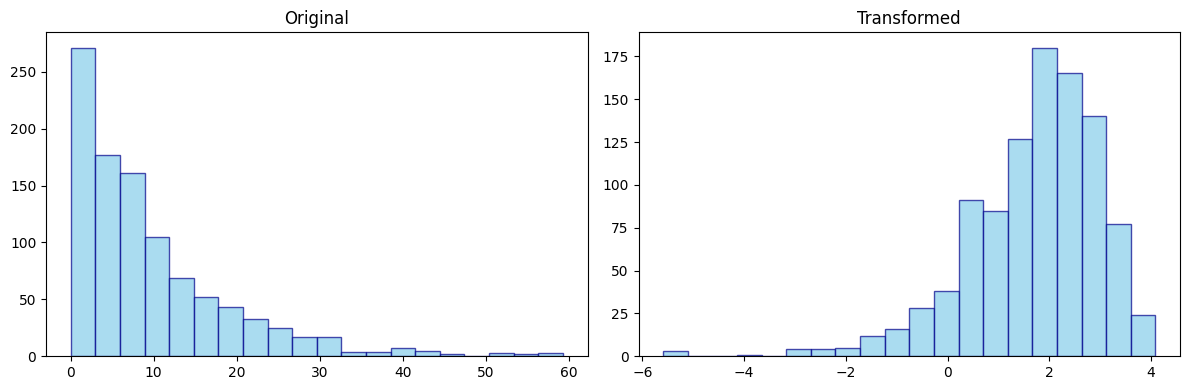

In [74]:
log_original_data = np.random.exponential(scale=10, size=1000) 
log_transformed_data = (np.log(log_original_data))

plot_transform(log_original_data, log_transformed_data)

## 2.2 Square Root
**Equation**: 
- $ x' = \sqrt{x} $
- *Backward Transformation*: $ x= (x')^2$

**Use Cases**:
- Reducing the range of data while preserving relative relationships.
- Addressing moderate skewness, often used for count data or non-negative values.

**Edge Cases**:
- Negative values ($x < 0$): Square root is undefined.  
- *Workaround*: Shift data by adding a constant to ensure all values are non-negative ($x + \epsilon \geq 0$).



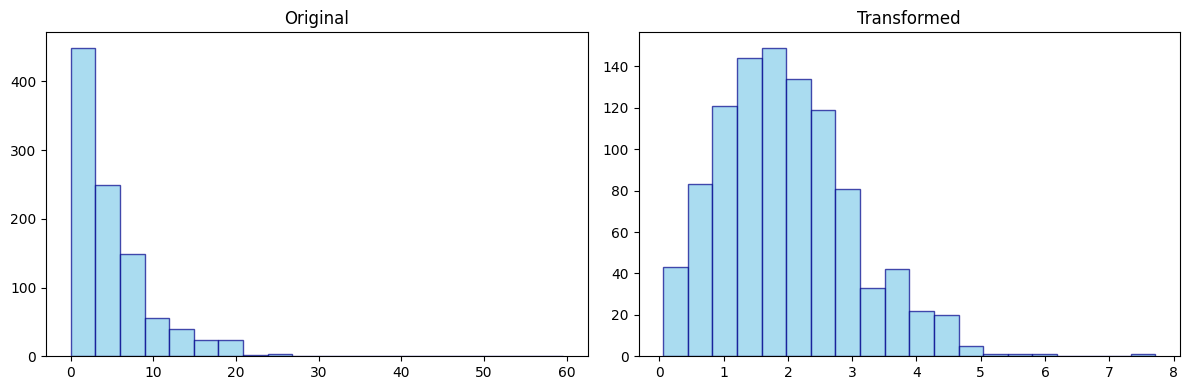

In [33]:
sqrt_original_data = np.random.exponential(scale=5, size=1000)
sqrt_transformed_data = (np.sqrt(sqrt_original_data))

plot_transform(sqrt_original_data, sqrt_transformed_data)

## 2.3 Box-Cox

**Equation** :
- $x' = \begin{cases} 
  \frac{x^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \\
  \log(x), & \text{if } \lambda = 0
  \end{cases} $
- *Backward Transformation*: $ x = \begin{cases} 
  (x' \cdot \lambda + 1)^{1/\lambda}, & \text{if } \lambda \neq 0 \\
  e^{x'}, & \text{if } \lambda = 0
  \end{cases}$

**Use Cases**:
- Normalizing data to approximate a Gaussian distribution.
- Handling heteroscedasticity in regression models.
- Works only for positive-valued data.

**Edge Cases**:
- Negative or zero values ($x \leq 0$): Box-Cox requires strictly positive values.  
- *Workaround*: Add a constant $\epsilon > 0$ to shift the data ($x + \epsilon$) before applying the transformation.


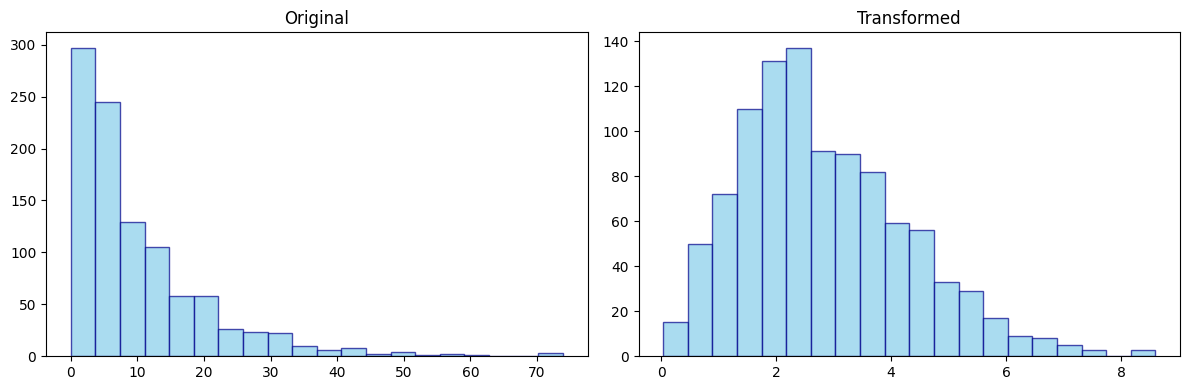

In [70]:
boxcox_original_data = np.random.exponential(scale=10, size=1000) 
boxcox_transformed_data = (np.sqrt(boxcox_original_data))

plot_transform(boxcox_original_data, boxcox_transformed_data)

# 3. Scaling

## 3.1 Normalizing
**Equation**:
- $ x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} $

**Use Case**:
- Useful when features need to be constrained to a specific range, especially in neural networks or PCA.

**Edge Cases**:
- When features need to be constrained to a specific range (e.g., [0, 1]) or when using algorithms like Neural Networks or PCA.

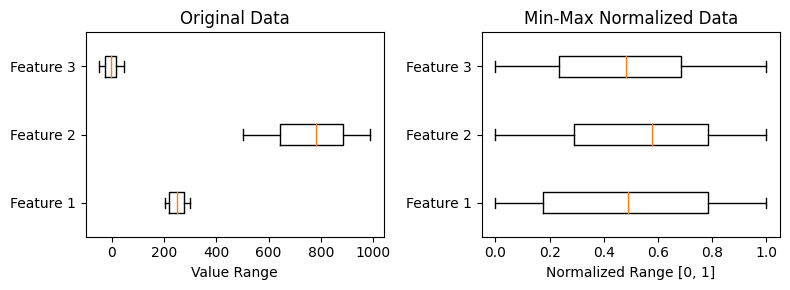

In [100]:
# Original datasets
data1 = np.random.uniform(200, 300, 100)  # Range: [0, 100]
data2 = np.random.uniform(500, 1000, 100)  # Range: [500, 1000]
data3 = np.random.uniform(-50, 50, 100)  # Range: [-50, 50]

# Combine the datasets into a DataFrame
original_data = pd.DataFrame({
    'Feature 1': data1,
    'Feature 2': data2,
    'Feature 3': data3
})

# Initialize Min-Max Scaler
scaler = MinMaxScaler()
minmax_scaled_data = scaler.fit_transform(original_data)
minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=original_data.columns)

# Combine the original and normalized data for comparison
comparison_sklearn = pd.concat([original_data.add_suffix(' (Original)'), minmax_scaled_df.add_suffix(' (Normalized)')], axis=1)

# Plot the original and normalized data using scikit-learn normalization
plt.figure(figsize=(8, 3))

# Original data
plt.subplot(1, 2, 1)
plt.boxplot(original_data.values, vert=False, labels=original_data.columns)
plt.title("Original Data")
plt.xlabel("Value Range")

# Normalized data (scikit-learn)
plt.subplot(1, 2, 2)
plt.boxplot(minmax_scaled_df.values, vert=False, labels=minmax_scaled_df.columns)
plt.title("Min-Max Normalized Data")
plt.xlabel("Normalized Range [0, 1]")

plt.tight_layout()
plt.show()


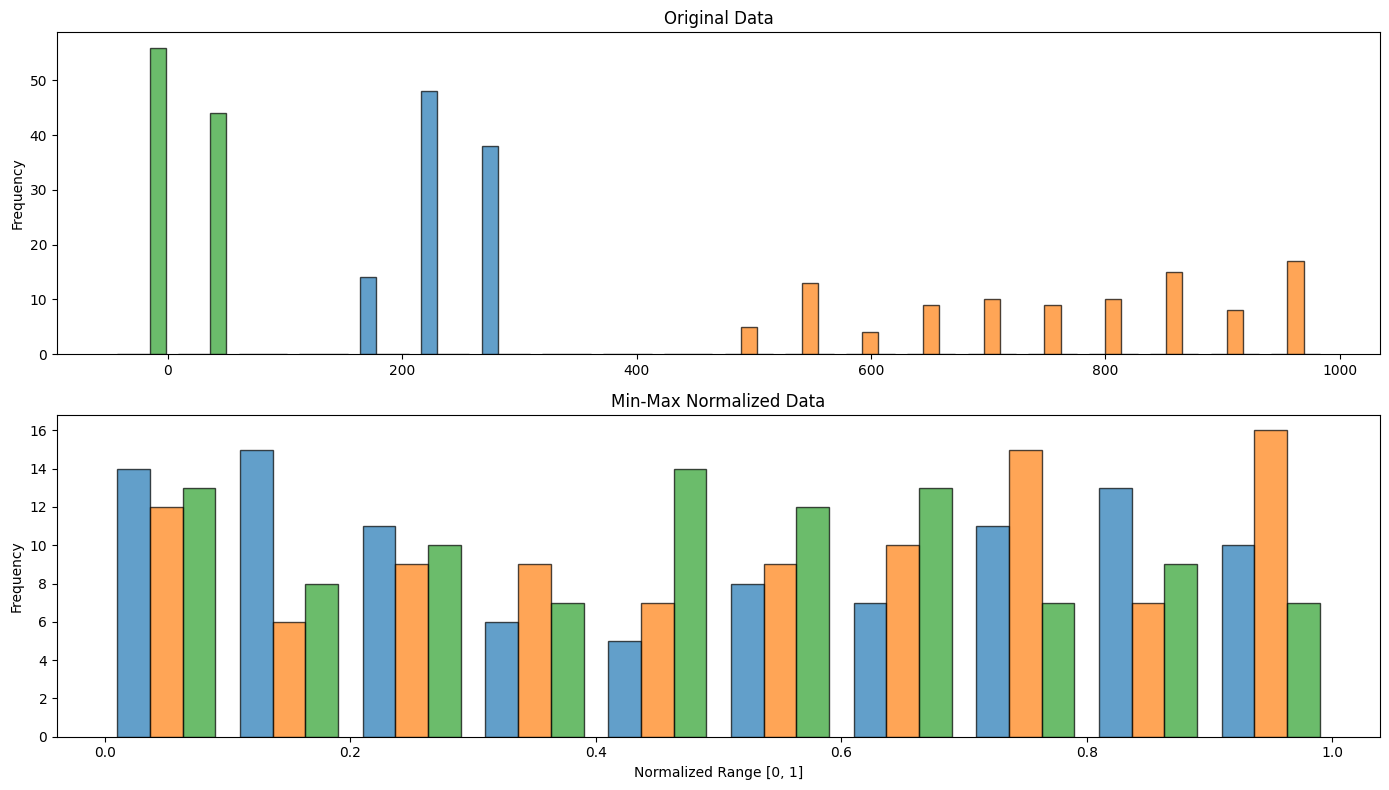

In [104]:
# Plot histograms to compare original and normalized data
plt.figure(figsize=(14, 8))

# Original data histograms
plt.subplot(2, 1, 1)
plt.hist(original_data.values, bins=20, label=original_data.columns, alpha=0.7, edgecolor='k')
plt.title("Original Data")
plt.ylabel("Frequency")

# Normalized data histograms
plt.subplot(2, 1, 2)
plt.hist(minmax_scaled_df.values, bins=10, label=minmax_scaled_df.columns, alpha=0.7, edgecolor='k')
plt.title("Min-Max Normalized Data")
plt.xlabel("Normalized Range [0, 1]")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## 3.2 Standardizing

**Equation**:
- $ x' = \frac{x - \text{mean}(x)}{\text{std}(x)} $  

**Use Case**:
- Used when features have different units or scales and models are sensitive to magnitudes (e.g., SVM, k-NN).

**Edge Cases**:
  - Constant features (e.g., all values are the same): Results in division by zero during standardization or min-max scaling.  
  - Workaround: Replace the scaled value with 0 for standardization or a constant for min-max scaling.


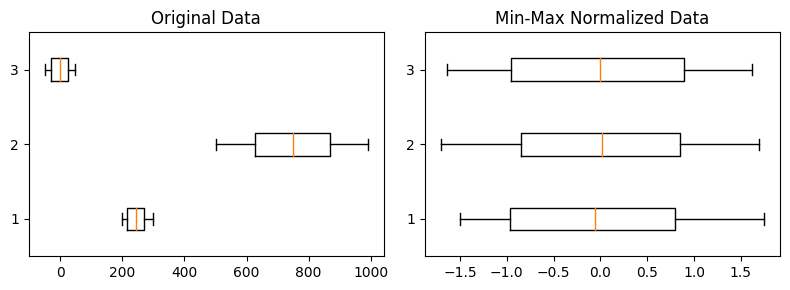

In [110]:
# Original datasets
data1 = np.random.uniform(200, 300, 100)  # Range: [0, 100]
data2 = np.random.uniform(500, 1000, 100)  # Range: [500, 1000]
data3 = np.random.uniform(-50, 50, 100)  # Range: [-50, 50]

# Combine the datasets into a DataFrame
original_data = pd.DataFrame({
    'Feature 1': data1,
    'Feature 2': data2,
    'Feature 3': data3
})

# Initialize Min-Max Scaler
scaler = StandardScaler()
minmax_scaled_data = scaler.fit_transform(original_data)
minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=original_data.columns)

# Combine the original and normalized data for comparison
comparison_sklearn = pd.concat([original_data.add_suffix(' (Original)'), minmax_scaled_df.add_suffix(' (Normalized)')], axis=1)

# Plot the original and normalized data using scikit-learn normalization
plt.figure(figsize=(8, 3))

# Original data
plt.subplot(1, 2, 1)
plt.boxplot(original_data.values, vert=False)
plt.title("Original Data")

# Normalized data (scikit-learn)
plt.subplot(1, 2, 2)
plt.boxplot(minmax_scaled_df.values, vert=False)
plt.title("Min-Max Normalized Data")

plt.tight_layout()
plt.show()

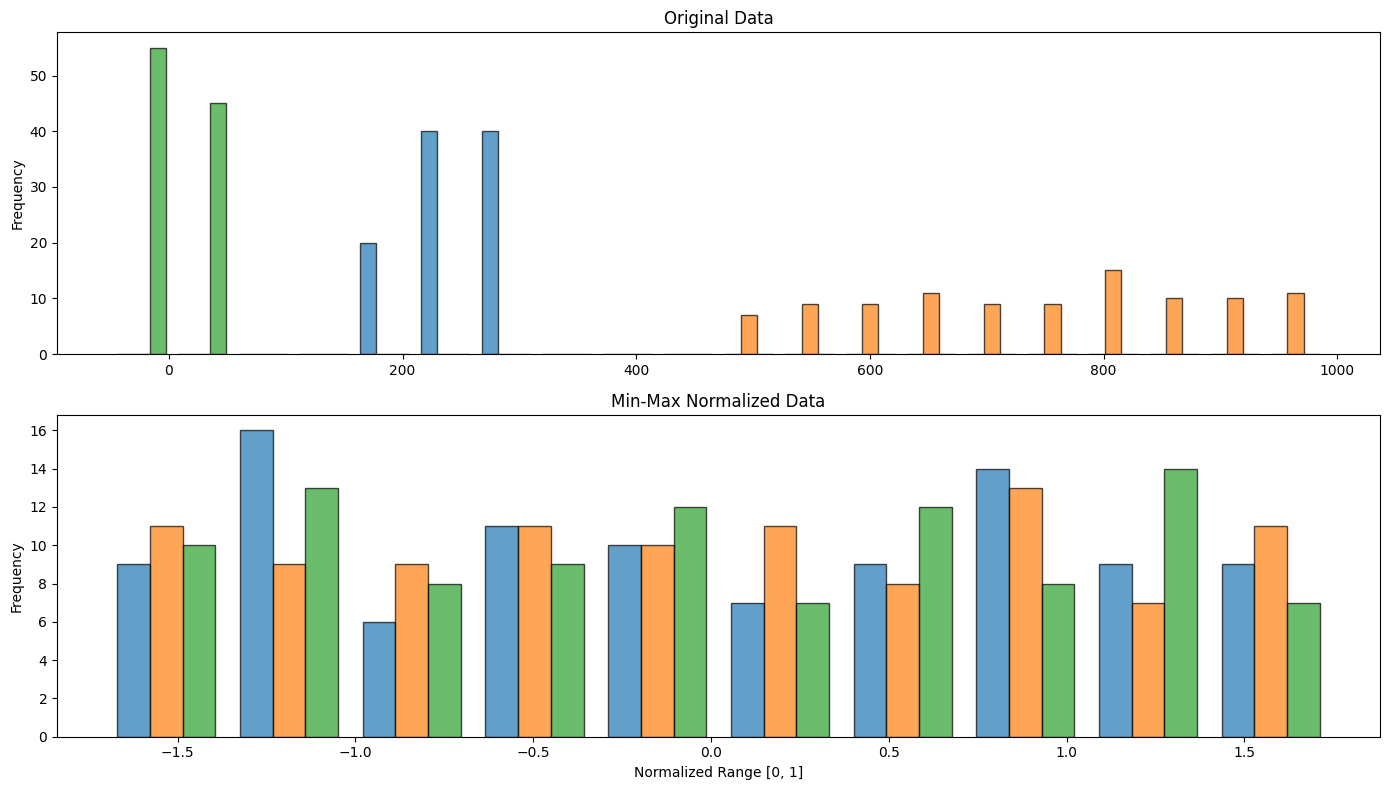

In [111]:
# Plot histograms to compare original and normalized data
plt.figure(figsize=(14, 8))

# Original data histograms
plt.subplot(2, 1, 1)
plt.hist(original_data.values, bins=20, label=original_data.columns, alpha=0.7, edgecolor='k')
plt.title("Original Data")
plt.ylabel("Frequency")

# Normalized data histograms
plt.subplot(2, 1, 2)
plt.hist(minmax_scaled_df.values, bins=10, label=minmax_scaled_df.columns, alpha=0.7, edgecolor='k')
plt.title("Min-Max Normalized Data")
plt.xlabel("Normalized Range [0, 1]")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# 4. Outlier Removal

**When to Remove Outliers**
- Extreme Values Affecting Analysis: If outliers significantly skew the results or affect the performance of algorithms sensitive to scale (e.g., linear regression, k-means clustering).
- Measurement Errors: When outliers result from data entry mistakes or faulty sensors, removing them ensures data quality.
- Non-Representative Data: If outliers do not belong to the population of interest (e.g., a non-human outlier in human height data).
- Small Datasets: Outliers can disproportionately impact results in small datasets, making their removal crucial.

**When to Add Outliers**
- Synthetic Data Generation: Adding outliers can stress-test models to improve robustness.
- Imbalanced Datasets: For rare events (e.g., fraud detection), simulating outliers can help train models on underrepresented cases.
- Scenario Testing: Outliers are useful for testing edge cases, particularly in risk analysis and anomaly detection models.
- Real-World Representation: When the application expects unusual behavior (e.g., stock market crashes, extreme weather events), including outliers improves model generalization.

**Key Considerations**
- Always analyze the context and domain relevance of outliers before removing or adding them.
- Use domain knowledge and visualization tools to identify whether outliers are legitimate or problematic.
- Document the reasons for handling outliers to ensure reproducibility and transparency.

## 4.1 Z-Score

**Equation**:
$z = \frac{x - \mu}{\sigma} $
- $z$: Z-score (normalized value)  
- $x$: Original value  
- $\mu$: Mean of the dataset  
- $\sigma$: Standard deviation of the dataset  

Data points are typically considered outliers if their Z-score falls outside a chosen threshold (e.g., $|Z| > 3$).

**Pros**:
- Simplicity: Easy to calculate and interpret.
- Standardized Approach: Works across different datasets without requiring domain-specific knowledge.
- Objective Criterion: Provides a consistent threshold (e.g., \(|Z| > 3$) for identifying outliers.
- Applicability: Effective when the data is approximately normally distributed.

**Cons**:
- Assumption of Normality: Assumes the data follows a normal distribution; less effective for skewed or non-Gaussian data.
- Sensitive to Extreme Values: Outliers can inflate the mean and standard deviation, making the method less reliable.
- Fixed Thresholds: The choice of a threshold (e.g., 3) might not suit all datasets and can lead to false positives or negatives.
- Impact on Small Datasets: In small datasets, removing points based on Z-scores might lead to overfitting or loss of valuable information.


## 4.2 IQR
**Equation**: $\text{IQR} = Q3 - Q1$
Outlier thresholds are calculated as:  
- Lower Bound: $ \text{Lower Bound} = Q1 - 1.5 \cdot \text{IQR} $
  - $Q1$: 25th percentile (first quartile).  
- Upper Bound: $\text{Upper Bound} = Q3 + 1.5 \cdot \text{IQR} $
  - $Q3$: 75th percentile (third quartile).  

Data points falling outside these bounds are considered outliers.


**Pros**:
- Robust to Non-Normal Distributions: Does not assume a normal distribution, making it suitable for skewed data.
- Insensitive to Extreme Values: Outliers do not affect the calculation of IQR, as it is based on percentiles.
- Simple and Intuitive: Easy to understand and implement, especially for datasets with clear quartiles.

**Cons**:
- Arbitrary Multiplier: The $1.5 \cdot \text{IQR}$ threshold is a rule of thumb and might not suit all datasets, especially those with a wide or narrow spread.
- Limited Scope for Multimodal Data: May struggle with datasets containing multiple clusters or distributions.
- Not Scalable: Less effective for high-dimensional data where outliers might exist in combinations of dimensions rather than individual features.



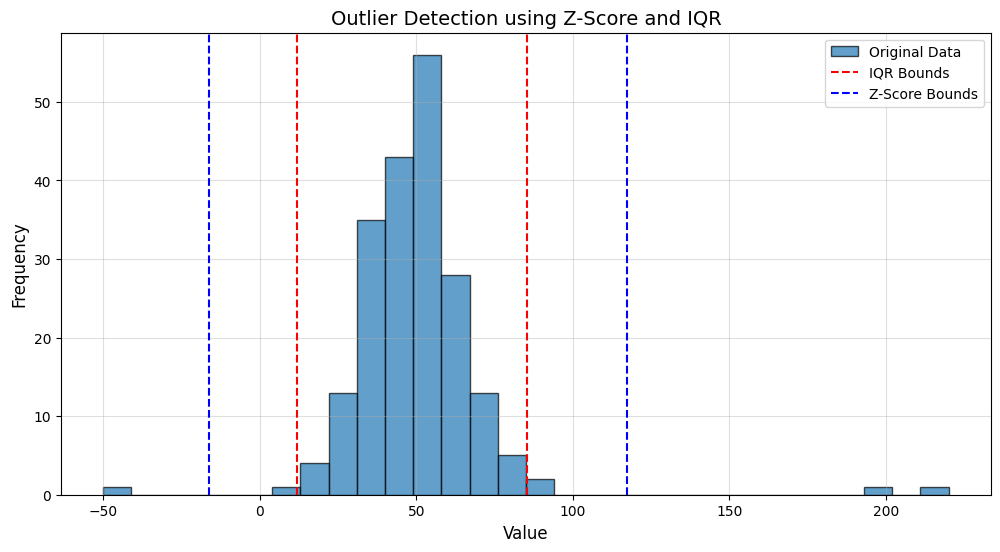

In [115]:
from statistics import mean
from scipy.stats import zscore

# Generate synthetic data
np.random.seed(42)
data = np.random.normal(loc=50, scale=15, size=200)  # Normally distributed data
data = np.append(data, [200, 220, -50])  # Add extreme outliers

# Convert data to a DataFrame for easier handling
df = pd.DataFrame(data, columns=["Value"])
# Apply Z-Score using scipy
mean = df["Value"].mean()
std = df["Value"].std()
df["Z-Score (Scipy)"] = zscore(df["Value"])
z_threshold = 3
z_outliers_scipy = df[np.abs(df["Z-Score (Scipy)"]) > z_threshold]

# Apply IQR using feature-engine
q1 = df["Value"].quantile(0.25)
q3 = df["Value"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


# Add IQR outlier detection results
df["IQR Outlier"] = (df["Value"] < lower_bound) | (df["Value"] > upper_bound)

# Create a summary of outliers detected
outlier_summary_with_packages = {
    "Method": ["Z-Score (Scipy)", "IQR (Feature-Engine)"],
    "Number of Outliers": [len(z_outliers_scipy), df["IQR Outlier"].sum()],
    "Outlier Values (First 5)": [
        z_outliers_scipy["Value"].head().tolist(),
        df[df["IQR Outlier"]]["Value"].head().tolist()
    ],
}

outlier_summary_with_packages_df = pd.DataFrame(outlier_summary_with_packages)

# Visualization
plt.figure(figsize=(12, 6))

# Original data histogram
plt.hist(df["Value"], bins=30, alpha=0.7, edgecolor='k', label="Original Data")
plt.axvline(lower_bound, color='red', linestyle="--", label="IQR Bounds")

plt.axvline(upper_bound, color='red', linestyle="--")
plt.axvline(mean + z_threshold * std, color='blue', linestyle="--", label="Z-Score Bounds")
plt.axvline(mean - z_threshold * std, color='blue', linestyle="--")

# Formatting
plt.title("Outlier Detection using Z-Score and IQR", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.4)

plt.show()